In [1]:
# Libraries
from itertools import combinations
from itertools import combinations_with_replacement
import pandas as pd
import numpy as np
from scipy import stats as st
import openpyxl

In [2]:
# Scoring Functions

def cribbage_combinations(hand):
    comb_1 = list(combinations(hand,1))
    comb_2 = list(combinations(hand,2))
    comb_3 = list(combinations(hand,3))
    comb_4 = list(combinations(hand,4))
    comb_5 = list(combinations(hand,5))
    comb_list = comb_1 + comb_2 + comb_3 + comb_4 + comb_5
    count_list = []
    value_list = []
    suit_list = []
    for card in hand:
        suit_list.append(card[1])
    for comb in comb_list:
        new_value = []
        new_count = []
        
        for i in range(len(comb)):
            if comb[i][0] == 'A':
                new_value.append(1)
                new_count.append(1)
            elif comb[i][0] == 'T':
                new_value.append(10)
                new_count.append(10)
            elif comb[i][0] == 'J':
                new_value.append(11)
                new_count.append(10)
            elif comb[i][0] == 'Q':
                new_value.append(12)
                new_count.append(10)
            elif comb[i][0] == 'K':
                new_value.append(13)
                new_count.append(10)
            else:
                new_value.append(int(comb[i][0]))
                new_count.append(int(comb[i][0]))
                
            
        count_list.append(new_count)
        value_list.append(new_value)
    return(count_list,value_list,suit_list)

def basic_scoring(count_list,value_list,suit_list,suited = True):
    points_15 = 0
    points_pair = 0
    points_run = 0
    points_flush = 0
    points_jacks = 0
    for i in count_list:
        i.sort()
        if sum(i) == 15:
            points_15 += 2
    for i in value_list:
        if len(i) < 5:
            i.sort()
        if len(i) == 2:
            if i[1] == i[0]:
                points_pair += 2
        elif len(i) == 3: 
            if i[2] == i[1]+1 == i[0]+2:
                points_run += 3
        elif len(i) == 4: 
            if i[3] == i[2]+1 == i[1]+2 == i[0]+3:
                points_run -= 2
        elif len(i) == 5:
            for index in range(len(i)):
                if i[index] == 11:
                    if (suit_list[index] == suit_list[4]) & (index != 4):
                        points_jacks += 1
            i.sort()
            if i[4] == i[3]+1 == i[2]+2 == i[1]+3 == i[0]+4:
                points_run -= 3
    if (suit_list[0] == suit_list[1] == suit_list[2] == suit_list[3]) & suited == True:
        points_flush += 4
        if (suit_list[4] == suit_list[3]) & suited == True:
            points_flush += 1
    total_points = points_15 + points_pair + points_run + points_flush + points_jacks
    return(total_points)

def score_counter(hand):
    count_list,value_list,suit_list = cribbage_combinations(hand)
    return(basic_scoring(count_list,value_list,suit_list))

def score_counter_unsuited(hand):
    count_list,value_list,suit_list = cribbage_combinations(hand)
    return(basic_scoring(count_list,value_list,suit_list, suited = False))
            

In [3]:
# Hand Permutations

from itertools import combinations_with_replacement

card_list = ['AH','2H','3H','4H','5H','6H','7H','8H','9H','TH','JH','QH','KH',
            'AD','2D','3D','4D','5D','6D','7D','8D','9D','TD','JD','QD','KD',
            'AS','2S','3S','4S','5S','6S','7S','8S','9S','TS','JS','QS','KS',
            'AC','2C','3C','4C','5C','6C','7C','8C','9C','TC','JC','QC','KC']  # Used for 4 Hand

card_list_unsuited = ['AH','2H','3H','4H','5H','6H','7H','8H','9H','TH','JH','QH','KH'] # Used for 2 Hand
 
possible_hands_4 = list(combinations(card_list,4))
possible_hands_2 = list(combinations(card_list_unsuited,2))

In [4]:
# Dataframe Construction Functions

def score_array(hand, suited = True):
    new_score_list = []
    hand = list(hand)
    if suited == True:
        hand_card_list = card_list.copy()
    else:
        hand_card_list = card_list_unsuited.copy()
    for card in hand:
        hand_card_list.remove(card)
    possible_additions = list(combinations(hand_card_list,5-len(hand)))
    for cards in possible_additions:
        cards = list(cards)
        hand_w_five = hand + cards
        if suited == True:
            new_score_list.append(score_counter(hand_w_five))
        else:
            new_score_list.append(score_counter_unsuited(hand_w_five))
    return(new_score_list)

def deconstruct_values(hand):
    hand = list(hand)
    hand.sort()
    value_string = ''
    for element in hand:
        value_string += element[0]
    return(value_string)

In [63]:
# 4 Card Draw Dataframe
hand_d_4 = {}
counter = 0
percent = 0
for hand in possible_hands_4:
    counter += 1
    if counter % 2707 == 0:
        percent += 1
        print(f"{percent}%")
    key = deconstruct_values(hand)
    value = score_array(hand)
    if key not in hand_d_4:
        hand_d_4[key] = value
    else:
        hand_d_4[key] += value
        
cribbage_df_4 = pd.DataFrame({'Hand': hand_d_4.keys(), 'Score_List':hand_d_4.values()})

1%
2%
3%
4%
5%
6%
7%
8%
9%
10%
11%
12%
13%
14%
15%
16%
17%
18%
19%
20%
21%
22%
23%
24%
25%
26%
27%
28%
29%
30%
31%
32%
33%
34%
35%
36%
37%
38%
39%
40%
41%
42%
43%
44%
45%
46%
47%
48%
49%
50%
51%
52%
53%
54%
55%
56%
57%
58%
59%
60%
61%
62%
63%
64%
65%
66%
67%
68%
69%
70%
71%
72%
73%
74%
75%
76%
77%
78%
79%
80%
81%
82%
83%
84%
85%
86%
87%
88%
89%
90%
91%
92%
93%
94%
95%
96%
97%
98%
99%
100%


In [5]:
# 2 Card Draw Dataframe
hand_d_2 = {}
for hand in possible_hands_2:
    key = deconstruct_values(hand)
    value = score_array(hand)
    if key not in hand_d_2:
        hand_d_2[key] = value
    else:
        hand_d_2[key] += value
        
cribbage_df_2 = pd.DataFrame({'Hand': hand_d_2.keys(), 'Score_List':hand_d_2.values()})

In [112]:
# Summary Functions

def better_mode(my_list):
    return(st.mode(my_list)[0][0])

def q1(my_list):
    return(np.percentile(my_list,q=25))

def q3(my_list):
    return(np.percentile(my_list,q=75))

#cribbage_df = (cribbage_df
cribbage_df_2 = (cribbage_df_2
.assign(Mean = lambda x: x['Score_List'].apply(np.mean),
        Median = lambda x: x['Score_List'].apply(np.median),
        Mode = lambda x: x['Score_List'].apply(better_mode),
        Std = lambda x: x['Score_List'].apply(np.std),
        Q1 = lambda x: x['Score_List'].apply(q1),
        Q3 = lambda x: x['Score_List'].apply(q3),
        Min = lambda x: x['Score_List'].apply(np.min),
        Max = lambda x: x['Score_List'].apply(np.max),
        Freq = lambda x: x['Score_List'].apply(len))
.sort_values('Mean',ascending=False)
              )


AttributeError: 'Rectangle' object has no property 'bw_adjust'

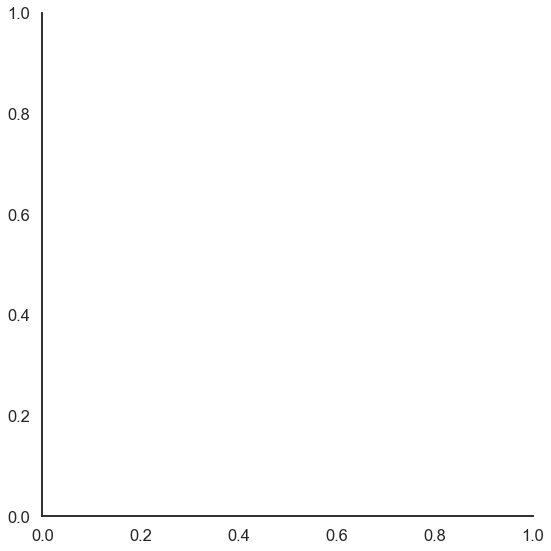

In [127]:
# Seaborn Visualization

import seaborn as sns

sns.set_style("white")
sns.set_context("talk")
sns.color_palette("hls", 8)

hand_dist = sns.displot(data = super_mega_score_list, kind = "hist", kde = True, 
                        color = 'blue',  binwidth=1, bw_adjust = 7, height = 8)


hand_dist.set(xlabel='Average Points',
       ylabel='Frequency',
       title='Point Distribution for All Possible Hands')

hand_dist